In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
model_data = pd.read_csv('data/model_data.csv')
agent_data = pd.read_csv('data/agent_data.csv')

[Text(0.5, 0, 'Opinion 1'),
 Text(0, 0.5, 'Opinion 2'),
 Text(0.5, 1.0, 'Agent Distribution in Opinion Space at Time Step 0'),
 (0.0, 1.0),
 (0.0, 1.0)]

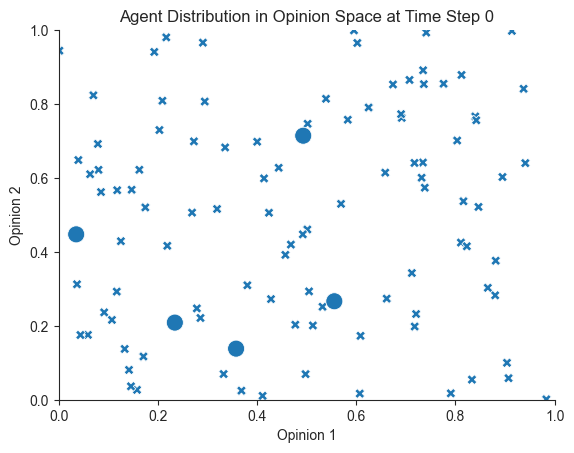

In [26]:
# agent starting positions
t0_agent_locations = agent_data.loc[agent_data['Step'] == 0]

# set plot styles
sns.set_style('ticks')
markers = {'voter': 'X', 'candidate': 'o'}
sizes = {'voter': 50, 'candidate': 150}

# plot
t0_plot = sns.scatterplot(
    data=t0_agent_locations,
    x='opinion1',
    y='opinion2',
    size='type',
    sizes=sizes,
    style='type',
    markers=markers,
    legend=False
)

t0_plot.spines[['right', 'top']].set_visible(False)
t0_plot.set(
    xlabel='Opinion 1',
    ylabel='Opinion 2',
    title='Agent Distribution in Opinion Space at Time Step 0',
    xlim=(0, 1),
    ylim=(0, 1)
)

[Text(0.5, 0, 'Opinion 1'),
 Text(0, 0.5, 'Opinion 2'),
 Text(0.5, 1.0, 'Agent Distribution in Opinion Space at Time Step 4000'),
 (0.0, 1.0),
 (0.0, 1.0)]

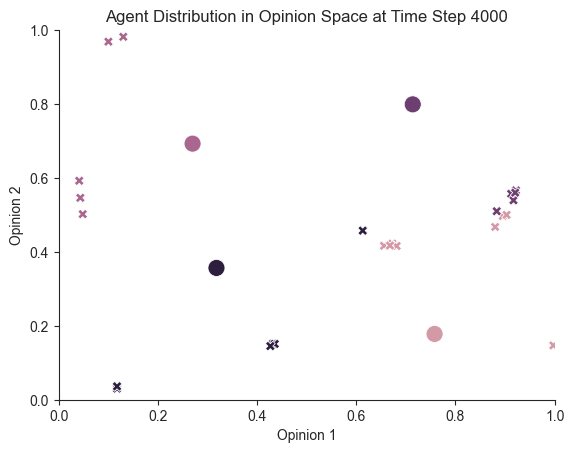

In [15]:
# agent positions at time step n >= 1
n = 4000
tn_agent_locations = agent_data.loc[agent_data['Step'] == n]

# set plot styles
sns.set_style('ticks')
markers = {'voter': 'X', 'candidate': 'o'}
sizes = {'voter': 50, 'candidate': 150}

# plot
tn_plot = sns.scatterplot(
    data=tn_agent_locations,
    x='opinion1',
    y='opinion2',
    size='type',
    sizes=sizes,
    style='type',
    markers=markers,
    hue='voted_for',
    legend=False
)

tn_plot.spines[['right', 'top']].set_visible(False)
tn_plot.set(
    xlabel='Opinion 1',
    ylabel='Opinion 2',
    title='Agent Distribution in Opinion Space at Time Step '+str(n),
    xlim=(0, 1),
    ylim=(0, 1)
)